In [158]:
import pandas as pd
import numpy as np
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, r2_score
from prophet.plot import plot_plotly

# 1. Cargar y preparar los datos

df = pd.read_csv('demanda-depurado.csv')
df['fecha'] = pd.to_datetime(df['fecha'])
df = df.drop(columns=['indicador', 'region'])


In [246]:
# 2. Definir función para entrenar frecuencia diario:

def entrenar_prophet(df, freq='D', pasos_futuros=250):
    # Reagrupar por frecuencia deseada
    df_resampleado = df.set_index('fecha')[['valor']].resample(freq).mean().dropna().reset_index()
    df_modelo = df_resampleado.rename(columns={'fecha': 'ds', 'valor': 'y'})
    df_modelo['y'] = np.log(df_modelo['y'] + 1)

    # Separar en train/test
    df_train = df_modelo[:-pasos_futuros]
    df_test = df_modelo[-pasos_futuros:].copy()

    # Entrenar modelo
    modelo = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
    modelo.fit(df_train)

    # Predecir
    future = modelo.make_future_dataframe(periods=pasos_futuros, freq=freq)
    forecast = modelo.predict(future)

    return modelo, forecast, df_test


In [248]:
# 3. Entrenar con frecuencia diario
modelo, forecast, df_test = entrenar_prophet(df, freq='S')

19:07:54 - cmdstanpy - INFO - Chain [1] start processing
19:07:54 - cmdstanpy - INFO - Chain [1] done processing


In [250]:
# 4. Calcular las métricas

df_test['ds'] = df_test['ds'].dt.to_period('W').dt.start_time
forecast['ds'] = forecast['ds'].dt.to_period('D').dt.start_time

# Combinar test con predicciones
forecast_test = forecast[['ds', 'yhat']]
df_test = df_test.merge(forecast_test, on='ds', how='left')
df_test = df_test.dropna(subset=['yhat'])

# Reescalar
y_true = np.exp(df_test['y']) - 1
y_pred = np.exp(df_test['yhat']) - 1

# Métricas
mae = mean_absolute_error(y_true, y_pred)
rmae = mae / y_true.mean()
r2 = r2_score(y_true, y_pred)

# Mostrar resultados
print("=== Resultados ===")
print(f"MAE:  {mae:.2f}")
print(f"RMAE: {rmae:.2%}")
print(f"R²:   {r2:.4f}")

=== Resultados ===
MAE:  19.36
RMAE: 2.77%
R²:   0.7810


In [252]:
joblib.dump(modelo, 'modelo_prophet_semanal.pkl')

['modelo_prophet_semanal.pkl']

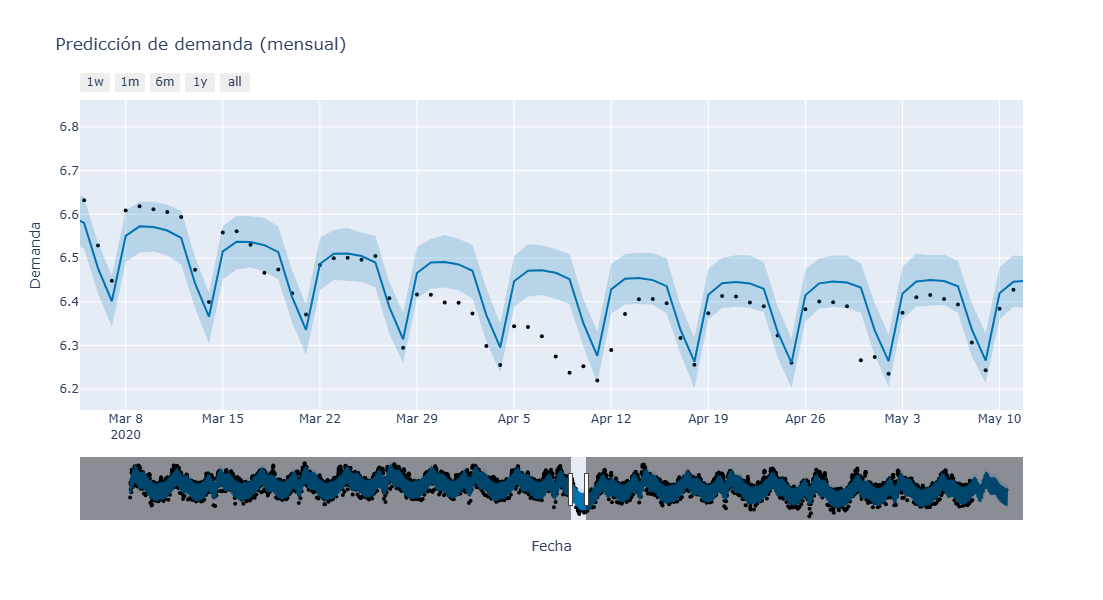

In [118]:
# 5. Mostrar gráfico diario
fig = plot_plotly(modelo, forecast)
fig.update_layout(title='Predicción de demanda (mensual)', xaxis_title='Fecha', yaxis_title='Demanda')
fig.show()

In [ ]:
# Se han entrenado diferentes parámetros para cada frecuencia, solo vamos a poner la función de cada una, el resto es igual a la diaria.
# 2. Definir función para entrenar frecuencia semanal:
def entrenar_prophet(df, freq='2Q', pasos_futuros=3):
    # Reagrupar por frecuencia deseada
    df_resampleado = df.set_index('fecha')[['valor']].resample(freq).mean().dropna().reset_index()
    df_modelo = df_resampleado.rename(columns={'fecha': 'ds', 'valor': 'y'})
    df_modelo['y'] = np.log(df_modelo['y'] + 1)

    # Separar en train/test
    df_train = df_modelo[:-pasos_futuros]
    df_test = df_modelo[-pasos_futuros:].copy()

    # Entrenar modelo
    modelo = Prophet(weekly_seasonality=True, daily_seasonality=True)
    modelo.add_seasonality(name='semestral', period=182.5, fourier_order=2)


    modelo.fit(df_train)

    # Predecir
    future = modelo.make_future_dataframe(periods=pasos_futuros, freq=freq)
    forecast = modelo.predict(future)

    return modelo, forecast, df_test

# 2. Definir función para entrenar frecuencia trimestral:
def entrenar_prophet(df, freq='Q', pasos_futuros=2):
    # Reagrupar por frecuencia deseada
    df_resampleado = df.set_index('fecha')[['valor']].resample(freq).mean().dropna().reset_index()
    df_modelo = df_resampleado.rename(columns={'fecha': 'ds', 'valor': 'y'})
    df_modelo['y'] = np.log(df_modelo['y'] + 1)

    # Separar en train/test
    df_train = df_modelo[:-pasos_futuros]
    df_test = df_modelo[-pasos_futuros:].copy()

    # Entrenar modelo
    modelo = Prophet(weekly_seasonality=False, daily_seasonality=False)
    modelo.add_seasonality(name='trimestral', period=91.25, fourier_order=5)

    modelo.fit(df_train)

    # Predecir
    future = modelo.make_future_dataframe(periods=pasos_futuros, freq=freq)
    forecast = modelo.predict(future)

    return modelo, forecast, df_test

# 2. Definir función para entrenar frecuencia semestral:
def entrenar_prophet(df, freq='2Q', pasos_futuros=3):
    # Reagrupar por frecuencia deseada
    df_resampleado = df.set_index('fecha')[['valor']].resample(freq).mean().dropna().reset_index()
    df_modelo = df_resampleado.rename(columns={'fecha': 'ds', 'valor': 'y'})
    df_modelo['y'] = np.log(df_modelo['y'] + 1)

    # Separar en train/test
    df_train = df_modelo[:-pasos_futuros]
    df_test = df_modelo[-pasos_futuros:].copy()

    # Entrenar modelo
    modelo = Prophet(weekly_seasonality=True, daily_seasonality=True)
    modelo.add_seasonality(name='semestral', period=182.5, fourier_order=2)


    modelo.fit(df_train)

    # Predecir
    future = modelo.make_future_dataframe(periods=pasos_futuros, freq=freq)
    forecast = modelo.predict(future)

    return modelo, forecast, df_test

# 2. Definir función para entrenar frecuencia anual:
def entrenar_prophet(df, freq='Y', pasos_futuros=7):
    # Reagrupar por frecuencia deseada
    df_resampleado = df.set_index('fecha')[['valor']].resample(freq).mean().dropna().reset_index()
    df_modelo = df_resampleado.rename(columns={'fecha': 'ds', 'valor': 'y'})
    df_modelo['y'] = np.log(df_modelo['y'] + 1)

    # Separar en train/test
    df_train = df_modelo[:-pasos_futuros]
    df_test = df_modelo[-pasos_futuros:].copy()

    # Entrenar modelo
    modelo = Prophet(weekly_seasonality=False, daily_seasonality=False)
    modelo.add_seasonality(name='anual', period=365.25, fourier_order=2)


    modelo.fit(df_train)

    # Predecir
    future = modelo.make_future_dataframe(periods=pasos_futuros, freq=freq)
    forecast = modelo.predict(future)

    return modelo, forecast, df_test